# Project 2
## COSC 522
Harshvardhan
Student Id: 609162

In [57]:
import numpy as np
import time as t
import matplotlib.pyplot as plt

## Task 1
**Task 1: Implement nonparametric learning using kNN.**
- (20 pts) Plot a figure of 1x2 subplots that illustrates the overall classification accuracy vs. k using the synthetic and the pima dataset. Provide your observations based on the figure.
- (10 pts) Generate a table similar to Tables 1 & 2 in Project 1 but adding one row reporting the performance of kNN. Use parameters in each learning algorithm that generated the best overall accuracy.
- (5 pts) Comment (0.5 ~ 1 page) on the pros and cons between parametric learning and non-parametric learning when applied to datasets with different characteristics.
- (15 pts) Using the synthetic dataset, can you draw the decision boundary of kNN with an explicit function like you did for the 3 cases of parametric learning? (use the k with the best overall accuracy) If not, what is a good way to illustrate the decision "boundary" on the test set? Overlay it on the same figure as the other three explicit boundaries from parametric learning, that you generated from Project 1.

In [58]:
# Euclidean distance function for kNN
def euclid(x1, x2):
    return (np.sqrt(np.dot(x1 - x2, x1 - x2)))

In [59]:
def knn_classifier(xtrain, ytrain, xtest, ytest, k):
    
    t1 = t.time()
    
    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(xtest.shape[0]):
        xti = xtest[i]
        d1 = np.zeros(xtrain.shape[0])
        
        # calculating distance between xti and all the other points
        for j in range(xtrain.shape[0]):
            d1[j] = euclid(xti, xtrain[j])
        
        # finding index of largest k points
        l = d1.argsort()[:k]
        
        # majority voting
        if (np.sum(ytrain[l])>k/2):
            yhat[i] = 1
        else:
            yhat[i] = 0
    
    
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

## For Pima Dataset

In [60]:
# Loading data
train = np.loadtxt("/Users/harsh/Downloads/pima.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

# Normalise train_x
train_x1 = (train_x - train_x.mean(0))/train_x.std(0) #saving it in a new variable as we still need train_x1 for normalising test_x

test_data = np.loadtxt("/Users/harsh/Downloads/pima.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# normalise test_x
test_x = (test_x - train_x.mean(0))/train_x.std(0)

#assigning train_x1 to train_x
train_x = train_x1

print(train_x.shape)

(200, 7)


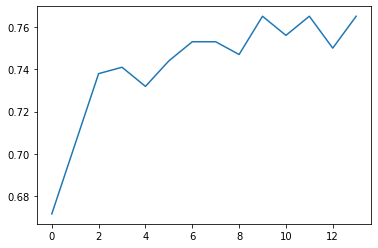

In [61]:
# maximum value of k
kmax_p = np.rint(np.sqrt(train_x.shape[0])).astype(int)

# initialising acc
acc_p = np.ones(kmax_p)

# finding classification accuracy
for i in range(kmax_p):
    acc_p[i] = knn_classifier(train_x, train_y, test_x, test_y, i)[1]
    
# plotting classification accuracy
p1 = plt.plot(range(kmax_p), acc_p)

For this dataset, the optimal value of k is 6 or 9. I'd go with 9 as that gives me the highest accuracy.

In [63]:
##### for pima dataset
a, b, c, d, e = knn_classifier(train_x, train_y, test_x, test_y, 9)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

Overall accuracy:  0.7650602409638554 
Class-0 Accuracy:  0.8923766816143498 
Class-1 Accuracy:  0.5045871559633027 
Runtime:  0.3472249507904053


## For Synthetic Dataset

In [64]:
# Loading synthetic dataset
train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

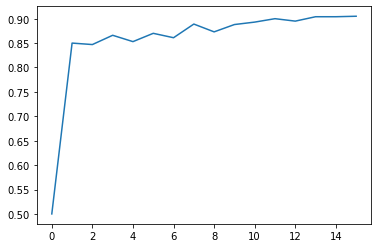

In [65]:
# maximum value of k
kmax_s = np.rint(np.sqrt(train_x.shape[0])).astype(int)

# initialising acc
acc_s = np.ones(kmax_s)

# finding classification accuracy
for i in range(kmax_s):
    acc_s[i] = knn_classifier(train_x, train_y, test_x, test_y, i)[1]
    
# plotting classification accuracy
plt.plot(range(kmax_s), acc_s)

For this dataset, the optimal value of k is 1.

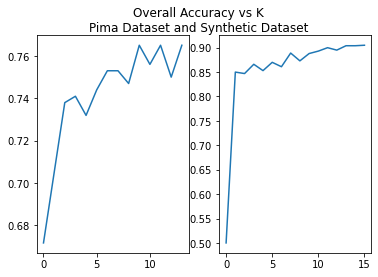

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Overall Accuracy vs K\nPima Dataset and Synthetic Dataset")
ax1.plot(range(kmax_p), acc_p)
ax2.plot(range(kmax_s), acc_s)

In [67]:
# for synthetic dataset
a, b, c, d, e = knn_classifier(train_x, train_y, test_x, test_y, 1)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

Overall accuracy:  0.85 
Class-0 Accuracy:  0.862 
Class-1 Accuracy:  0.838 
Runtime:  1.7864928245544434


## Summary Results

### Results Table

|   Synthetic Dataset  | Euclidean Classifier | Mahalanobis Classifier | Quadratic Classifier | kNN Classifier |
|:--------------------:|----------------------|------------------------|----------------------|----------------|
|   Overall Accuracy   | 0.713                | 0.892                  | 0.898                | 0.85           |
|   Class-0 Accuracy   | 0.68                 | 0.9                    | 0.908                | 0.862          |
|   Class-1 Accuracy   | 0.746                | 0.884                  | 0.888                | 0.838          |
| Runtime (in seconds) | 0.0241               | 0.0582                 | 0.0673               | 1.708          |

|     Pima Dataset     | Euclidean Classifier | Mahalanobis Classifier | Quadratic Classifier | kNN Classifier |
|:--------------------:|----------------------|------------------------|----------------------|----------------|
|   Overall Accuracy   | 0.741                | 0.768                  | 0.741                | 0.765          |
|   Class-0 Accuracy   | 0.758                | 0.789                  | 0.803                | 0.893          |
|   Class-1 Accuracy   | 0.706                | 0.724                  | 0.615                | 0.504          |
| Runtime (in seconds) | 0.00967              | 0.0197                 | 0.0429               | 0.360          |

## Pros and Cons of Parametric and Non-parametric Learning
**Easy:** The benefit of parametric learning methods is that these methods are simpler to implement. Once we have the data, the methods can easily be used to determine the learning algorithm. Au contraire, parametric methods like kNN are not that easy to implement. Even with the data, we have to iterate through multiple times to decide the number of k which is tedious.

**Speed:** Parametric learning methods are also very quick to learn from the data which is evident from their runtimes. Non-parametric methods like kNN takes a long time, evidently thrice the time for the synthetic dataset and seven times for Pima dataset.

**Accuracy:** There is no gurantee that non-parametric methods will perform better than parametric methods. Even when we have to accurately decide the mean and covariance matrices for learning, parametric methods (especially Mahalanobis classifier) performs much better as it has higher accuracy and faster runtime.

**Optimal Solution:** It can be proven using statistical learning methods that the local or sample optimal solution obtained from parametric methods is closer to the population optimal solution. However, for non-parametric learning the points are usually very far. Further, it can be proven that kNN gives suboptimal solutions.

In [68]:
# plotting decision boundaries
x1 = np.linspace(-1.5, 1.5, len(test_y))
x2 = np.linspace(-0.5, 1, len(test_y))
print(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2)
Z = knn_classifier(train_x, train_y, test_x, test_y, 6)[0]
Zt = Z.reshape(x1.shape)
plt.tripcolor(x1, x2, Z)
#plt.scatter(test_x[:, 0], test_x[:, 0], c = test_y)

(1000,) (1000,)


ValueError: cannot reshape array of size 1000 into shape (1000,1000)

In [69]:
x1 = np.linspace(-1.5, 1.5, len(test_y))
x2 = np.linspace(-0.5, 1, len(test_y))
Z = knn_classifier(train_x, train_y, test_x, test_y, 6)[0]

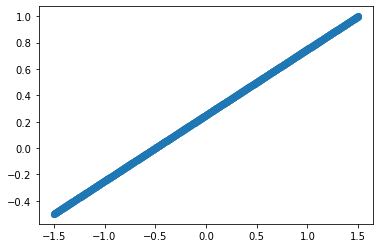

In [70]:
plt.scatter(x1, x2)

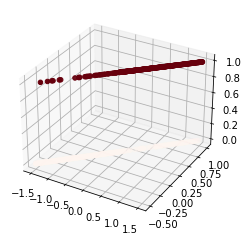

In [71]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x1, x2, Z, c=Z, cmap='Reds')

# Task 2
Task 2: Implement unsupervised clustering approaches (kmeans and wta) for classification purpose.Using the pima dataset. For fair comparison, make sure you use the statistics derived from the training set to normalize the test set, like you did in Project 1. That is, the clustering approaches need to use the normalized testset. Assume the number of clusters is 2. Also assume the prior probability ratio is 1:3 wherever needed.

- (30 pts) Implement the two clustering approaches and plot a figure of "percentage of samples changing membership" vs. "epoch" for both kmeans and wta. That is, the figure should contain two profiles, one for kmeans and one for wta.
- (5 pts) Comment on the different behaviors of kmeans and wta.
- (10 pts) Present another table by modifying the table you generated in Task 1 by adding two more rows from kmeans and wta and one column with "number of iterations to converge".
- (5 pts) Comment on the different performance between using supervised approaches and unsupervised approaches for classification purpose.

In [72]:
# Loading data
train = np.loadtxt("/Users/harsh/Downloads/pima.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

# Normalise train_x
train_x1 = (train_x - train_x.mean(0))/train_x.std(0) #saving it in a new variable as we still need train_x1 for normalising test_x

test_data = np.loadtxt("/Users/harsh/Downloads/pima.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# normalise test_x
test_x = (test_x - train_x.mean(0))/train_x.std(0)

#assigning train_x1 to train_x
train_x = train_x1

In [74]:
# function to perform k means clustering
def kmeans(x, k, imax = 1000):
    # setting seed for replicability 
    np.random.seed(1)
    
    m = 1
    
    # randomly assigning each sample to one of the k clusters
    clust = np.random.choice(k, x.shape[0])
    
    mu = np.zeros((k, x.shape[1]))

    # finding cluster means
    for i in range(k):
        mu[i,:] = np.mean(x[np.where(clust == i),:])
       
    # flag to check if cluster labels have changed
    flag = 1
    
    per_mem_change = []
    per_mem_change.append(0)
    
    while flag == 1:
        cl_start = clust.copy()
        for j in range(x.shape[0]):
            y = np.zeros(k)
            for i in range(k):
                y[i] = euclid(x[j], mu[i])

            clust[j] = np.argmin(y)

        per_mem_change.append(1-np.sum(cl_start == clust)/x.shape[0])
        
        # stop when classification doesn't change anymore
        if (cl_start == clust).all():
            flag = 0
        else:
            flag = 1
            
        # resetting cluster means
        for i in range(k):
            mu[i,:] = np.mean(x[np.where(clust == i)[0],:])
        
        m = m+1

        if(m == imax):
            break
    return clust, per_mem_change, m

In [75]:
# function to perform k means clustering with wta
def wta_kmeans(x, k, lp = 0.01, imax = 1000):
    # setting seed for replicability 
    np.random.seed(1)
    
    m = 1
    
    # randomly assigning each sample to one of the k clusters
    clust = np.random.choice(k, x.shape[0])
    
    mu = np.zeros((k, x.shape[1]))

    # finding cluster means
    for i in range(k):
        mu[i,:] = np.mean(x[np.where(clust == i),:])
       
    # flag to check if cluster labels have changed
    flag = 1
    
    per_mem_change = []
    per_mem_change.append(0)
    
    while flag == 1:
        cl_start = clust.copy()
        for j in range(x.shape[0]):
            y = np.zeros(k)
            for i in range(k):
                y[i] = euclid(x[j], mu[i])

            clust[j] = np.argmin(y)
            
        per_mem_change.append(1-np.sum(cl_start == clust)/x.shape[0])
        
        # stop when classification doesn't change anymore
        if (cl_start == clust).all():
            flag = 0
        else:
            flag = 1
            
        # resetting cluster means
        for i in range(k):
            mu[i] = mu[i] + lp*(x[j] - mu[i])
        
        m = m+1

        if(m == imax):
            break
    return clust, per_mem_change, m

In [76]:
t1 = t.time()
pc = kmeans(test_x, 2)
print("Time taken for k-means:", t.time() - t1)
overall_acc = np.sum(pc[0] == test_y)/len(test_y)
class0_acc = np.sum(pc[0][test_y == 0] == 0)/np.sum(test_y == 0)
class1_acc = np.sum(pc[0][test_y == 1] == 1)/np.sum(test_y == 1)
print("Overall Acc: ", overall_acc, "\nClass 0 Acc: ", class0_acc, "\nClass 1 Acc: ", class1_acc,
     "\nIterations: ", pc[2])

Time taken for k-means: 0.034008026123046875
Overall Acc:  0.27710843373493976 
Class 0 Acc:  0.28699551569506726 
Class 1 Acc:  0.25688073394495414 
Iterations:  6


In [77]:
t1 = t.time()
pc_wta = wta_kmeans(test_x, 2) #default learning parameter is 0.01
print("Time taken for WTA k-means:", t.time() - t1)
overall_acc = np.sum(pc_wta[0] == test_y)/len(test_y)
class0_acc = np.sum(pc_wta[0][test_y == 0] == 0)/np.sum(test_y == 0)
class1_acc = np.sum(pc_wta[0][test_y == 1] == 1)/np.sum(test_y == 1)
print("Overall Acc: ", overall_acc, "\nClass 0 Acc: ", class0_acc, "\nClass 1 Acc: ", class1_acc, 
     "\nIterations: ", pc_wta[2])

Time taken for WTA k-means: 0.021689653396606445
Overall Acc:  0.2921686746987952 
Class 0 Acc:  0.32286995515695066 
Class 1 Acc:  0.22935779816513763 
Iterations:  3


0.9668674698795181

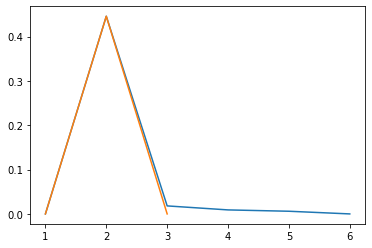

In [78]:
plt.plot(range(1,len(pc[1])+1), pc[1])
plt.plot(range(1,len(pc_wta[1])+1), pc_wta[1])

#checking difference between the algorithm results
(pc[0] == pc_wta[0]).sum()/len((pc[0] == pc_wta[0]))

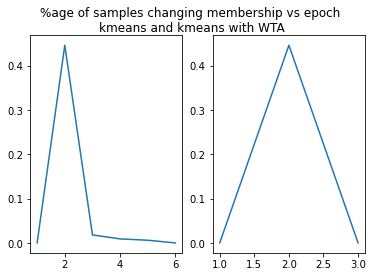

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("%age of samples changing membership vs epoch \nkmeans and kmeans with WTA")
ax1.plot(range(1,len(pc[1])+1), pc[1])
ax2.plot(range(1,len(pc_wta[1])+1), pc_wta[1])

### Comment on the different behaviors of kmeans and wta.
kmeans clustering takes longer to converge as it waits till the memberships have stopped changing. However, since WTA updates mean or cluster centers in a way that's superior to naive kmeans, it converges faster.

It is important to note that both the algorithms give us almost the same results as there is 96% match in the cluster memberships offered by both the algorithms.

**Speed:** WTA is much faster than naive k-means.

**Data:** There is no direct difference between how much data is required by both algorithms but it looks fair that both algorithms work similarly so should require almost the same number of observations.

**Usage:** WTA is probably is the faster algorithm to use as it converges faster.

### Accuracy for k-means and WTA k-means
|       Pima Dataset       | Euclidean Classifier | Mahalanobis Classifier | Quadratic Classifier | kNN Classifier | k-means | WTA k-means |
|:------------------------:|----------------------|------------------------|----------------------|----------------|---------|-------------|
|     Overall Accuracy     | 0.741                | 0.768                  | 0.741                | 0.765          | 0.277   | 0.292       |
|     Class-0 Accuracy     | 0.758                | 0.789                  | 0.803                | 0.893          | 0.286   | 0.323       |
|     Class-1 Accuracy     | 0.706                | 0.724                  | 0.615                | 0.504          | 0.256   | 0.229       |
|   Runtime (in seconds)   | 0.00967              | 0.0197                 | 0.0429               | 0.360          | 0.0414  | 0.0281      |
| # iterations to converge |                      |                        |                      |                | 6       | 3           |